<a href="https://colab.research.google.com/github/BintiKadzo/DSC14_Wk8_Nairobi_Hospital_Hypothyroidism_Test_Analysis/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2022_04_Matilda_Kadzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a.) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

* Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b.) Defining the Metric for Success

This project will be considered successful when:

1.   We Identify the most crucial independent variables that affect Hypothyroidism.

2.  The model achieves atleast 90% accuracy

3. Have the lowest RMSE score possible

### c.) Understanding the Context

Hypothyroidism means that the thyroid gland can't make enough thyroid hormone to keep the body running normally. People are hypothyroid if they have too little thyroid hormone in the blood.

The thyroid gland main function is releasing and controlling thyroid hormones that control metabolism. If the body makes too much thyroid hormone, you can develop a condition called hyperthyroidism. If the body makes too little thyroid hormone, it’s called hypothyroidism.

Common causes are autoimmune disease, such as Hashimoto's thyroiditis, surgical removal of the thyroid, and radiation treatment.

Thyroid disease can be up to eight times more likely in women than men.

Some of the terminologies used in this dataset are:

Thyroid Stimulating Hormone (TSH) - rises whenever the thyroid gland fails to produce sufficient thyroid hormone. When there is too much thyroid hormone present in the serum, the brain responds by lowering the TSH. It is High in hyperthyroidism and Low in hypothyroidism.

Thyroid binding globulin(TBG) - plasma proteins. Triiodothyronine (T3) - High in hyperthyroidism and Low in hypothyroidism.

Total thyroxine (TT4) - High in hyperthyroidism and Low in hypothyroidism. It is usually slightly High during pregnancy because of increased levels of TBG.

Free Thyroxine Index (FTI) - considered a more reliable indicator of thyroid status and is High in hyperthyroidism and Low in hypothyroidism.

### d.) Recording the Experimental Design

1.   To specify the question

2. Find and deal with outliers and other anomalies such as missing data and duplicates

3. Perform exploratory data analysis on the dataset. I will do both univariate and bivariate analysis.

4. Build classification models using Decision Trees and SVM then pick the best model for this dataset.

5. Draw a conclusion & make recommendations


### e.) Data Relevance

The relavance of our data will be answered by the following questions:

1. How accurate is the data at predicting whether a patient has hypothyroidism or not?

2. Was the dataset sufficient?

3. Was the data biased?

4. Is the data source a reliable source?

## 2. Reading the Data

In [119]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Loading our dataset

hypothyroid = pd.read_csv('hypothyroid.csv')
hypothyroid

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?


## 3. Checking the Data

In [121]:
# Checking the top entries of our dataset

hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [122]:
# Checking the bottom of our dataset

hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [123]:
# Checking the shape of the dataset

hypothyroid.shape

(3163, 26)

In [124]:
# Checking the datatypes in our dataset

hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## 4. External Datasource Validation

This daaset was validated using the hypothyroid dataset from Kaggle. It is legitimate and has the rlevant data to answer our question.

## 5. Tidying the Dataset

In [125]:
# Converting the ? to null values

hypothyroid_df = hypothyroid.replace(['?'], np.nan)
hypothyroid_df.isnull().sum().sum()

5329

In [126]:
# replacing values and variables
#hypothyroid_df = hypothyroid_df.replace({'f' : 0, 't' : 1})
#hypothyroid_df = hypothyroid_df.replace({'n' : 0, 'y' : 1})


In [127]:
# Changing the data types 

# Creating a copy of the dataset

hypothyroid_newdf = hypothyroid_df

# Creating a categorical columns array

categorical_columns = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

# Creating a numerical columns array 

numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in hypothyroid_newdf.columns:
  if column in numerical_columns:
    hypothyroid_newdf[column]= pd.to_numeric(hypothyroid_newdf[column])
  
  else:
    hypothyroid_newdf[column] = hypothyroid_newdf[column].astype('category')

In [128]:
# Confirm the new datatypes

hypothyroid_newdf.dtypes


status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [129]:
# View the columns in the dataset

hypothyroid_newdf.columns


Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [130]:
# For uniformity, change the column names to lower case 

hypothyroid_newdf.columns=map(str.lower,hypothyroid_newdf.columns)
hypothyroid_newdf.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [131]:
# Search for missing values

hypothyroid_newdf.isnull().sum().sum()

5329

In [132]:
# Checking the dataset shape 

hypothyroid_newdf.shape


(3163, 26)

In [133]:
# To deal with the missing values, we will drop all TBG columns with null values

hypothyroid_newdf.drop(['tbg'], axis=1, inplace = True)

In [134]:
# We will fill all the missing values in columns 
hypothyroid_newdf['age'].fillna(hypothyroid_newdf['age'].mean(), inplace = True)


In [135]:
hypothyroid_newdf['sex'].fillna(hypothyroid_newdf['sex'].mode(), inplace = True)


In [136]:
hypothyroid_newdf.shape

(3163, 25)

In [137]:
#  Checking for the presence of null values

hypothyroid_newdf.isnull().sum()

status                         0
age                            0
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
tsh_measured                   0
tsh                          468
t3_measured                    0
t3                           695
tt4_measured                   0
tt4                          249
t4u_measured                   0
t4u                          248
fti_measured                   0
fti                          247
tbg_measured                   0
dtype: int64

In [138]:
# Drop the missing values

hypothyroid_newdf.dropna(inplace  =True)


In [139]:
# Check for cumulative number of missing values

hypothyroid_newdf.isnull().sum().sum()

# There are no missing values in our dataset

0

In [140]:
# Checking the dataset's shape after handling the missing values

hypothyroid_newdf.shape

(2338, 25)

In [141]:
# Checking for sum of duplicates

hypothyroid_newdf.duplicated().sum()

59

In [142]:
# Drop the 59 duplicated entries
hypothyroid_newdf.drop_duplicates(inplace =True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

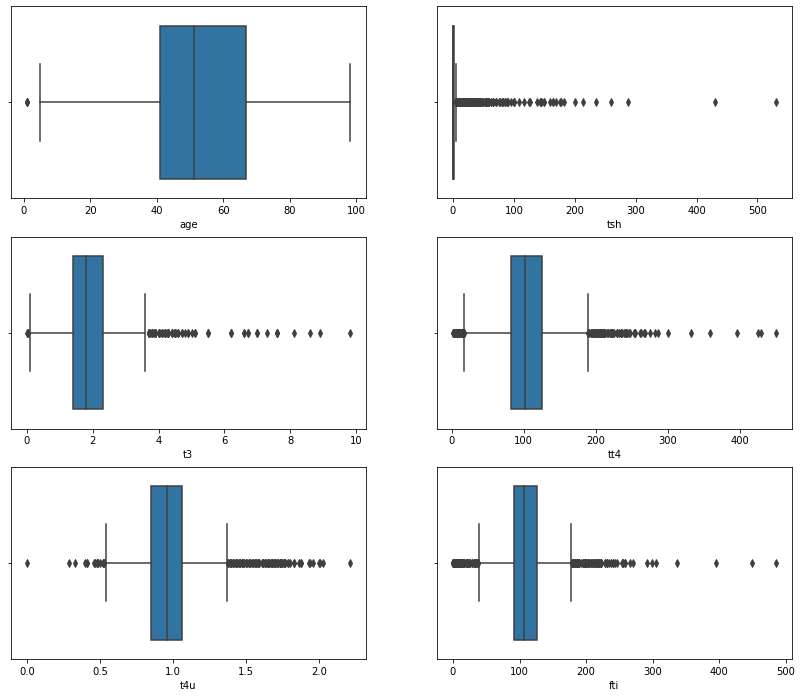

In [143]:
# Using boxplots, check for the presence of any outliers

numerical_columns = ['age','tsh','t3', 'tt4', 't4u', 'fti']

fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize=(14,12))
for ax, data,column in zip(axes.flatten(),hypothyroid_newdf,numerical_columns):
  sns.boxplot(hypothyroid_newdf[column],ax=ax)

There are outliers within our dataset, however, none of them shall be dropped.

## 6. Exploratory Data Analysis

### a.) Uniariate Analysis


In [144]:
# Exploring our target column

hypothyroid_newdf['status'].describe()


count         2279
unique           2
top       negative
freq          2153
Name: status, dtype: object

### Measure of Central Tenency

In [145]:
# Mean for the age and sex columns

hypothyroid_newdf['age'].mean()


53.229641654620494

In [146]:
# Mode for the age and sex columns

hypothyroid_newdf['age'].mode()

0    51.154214
dtype: float64

In [147]:
# Mode for the age and sex columns

hypothyroid_newdf['age'].median()

51.154214206845786

### Plotting Frequency tables for the columns

In [148]:
# Sex frequency table

hypothyroid_newdf['sex'].value_counts().to_frame()


,sex
F,1548
M,731


It is noted that most of the patients affected by hypothyroid are Female

In [149]:
# Age frequency table

hypothyroid_newdf['age'].value_counts().to_frame()


,age
51.154214,333
72.000000,50
70.000000,49
62.000000,49
60.000000,49
...,...
10.000000,1
97.000000,1
98.000000,1
5.000000,1


Majority of the patients tested in the facility are those of 51 years of age.

In [150]:
# Pregnant frequency table

hypothyroid_newdf['pregnant'].value_counts().to_frame()

,pregnant
f,2229
t,50


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


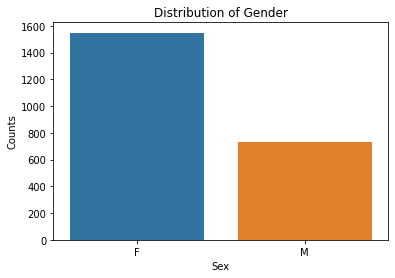

In [151]:
# Plotting countplots

sns.countplot(hypothyroid_newdf['sex'], palette ='tab10')
plt.title('Distribution of Gender')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


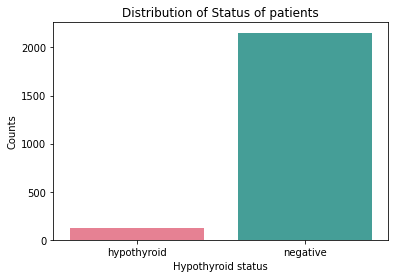

In [152]:
sns.countplot(hypothyroid_newdf['status'], palette ='husl')
plt.title('Distribution of Status of patients')
plt.xlabel('Hypothyroid status')
plt.ylabel('Counts')
plt.show()

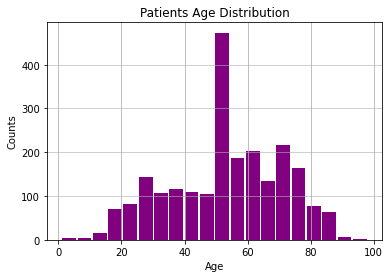

In [153]:
# Plotting a histogram for display of age distribution

size, scale = 1000, 10
age = hypothyroid_newdf['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='purple')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

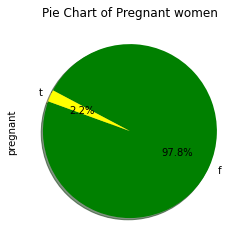

In [154]:
# Pie chart for pregnant women
colors = [ 'green','yellow']
hypothyroid_newdf['pregnant'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 160)
plt.title('Pie Chart of Pregnant women')
plt.show()

## b.) Bivariate Analysis

In [155]:
# Plotting a correlation matrix to check for multicollinearity

hypothyroid_newdf.corr()

,age,tsh,t3,tt4,t4u,fti
age,1.000000,-0.002182,-0.318504,-0.109930,-0.226726,0.028400
tsh,-0.002182,1.000000,-0.193376,-0.328666,0.074085,-0.378819
t3,-0.318504,-0.193376,1.000000,0.582161,0.482897,0.331298
tt4,-0.109930,-0.328666,0.582161,1.000000,0.419392,0.802839
t4u,-0.226726,0.074085,0.482897,0.419392,1.000000,-0.151445
fti,0.028400,-0.378819,0.331298,0.802839,-0.151445,1.000000


There seems to be a high correlation between fti and tt4, and between t3 and tt4.

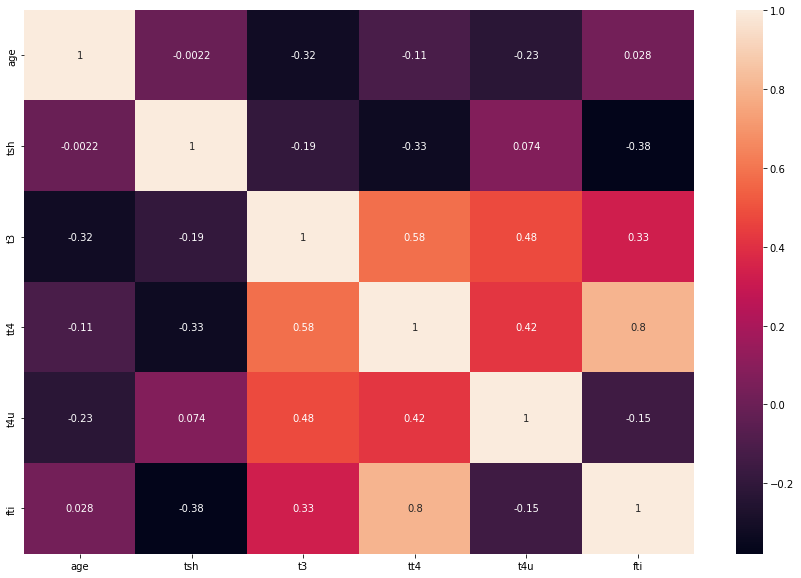

In [156]:
# Plotting a heatmap for correlation visualization

plt.figure(figsize=(15,10))
sns.heatmap(hypothyroid_newdf.corr(), annot = True)
plt.show()

## 7.) Implementing the Solution

### Decision Tree Classifier

In [157]:
# Using Decision trees as our baseline
# Importing the necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [184]:
dummies = pd.get_dummies(hypothyroid_newdf.sex)

hypothyroid_newdf = pd.concat([hypothyroid_newdf,dummies], axis = 'columns')
hypothyroid_newdf .drop = (['sex'])
hypothyroid_newdf 


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,F,M
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,0.6,y,15.0,y,1.48,y,10.0,n,0,1
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,1.7,y,19.0,y,1.13,y,17.0,n,1,0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,0.2,y,4.0,y,1.00,y,0.0,n,0,1
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,0.4,y,6.0,y,1.04,y,6.0,n,1,0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,1.2,y,57.0,y,1.28,y,44.0,n,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,...,1.7,y,86.0,y,0.91,y,95.0,n,1,0
3159,negative,29.0,F,f,f,f,f,f,f,f,...,1.8,y,99.0,y,1.01,y,98.0,n,1,0
3160,negative,77.0,M,f,f,f,f,f,f,f,...,0.6,y,71.0,y,0.68,y,104.0,n,0,1
3161,negative,74.0,F,f,f,f,f,f,f,f,...,0.1,y,65.0,y,0.48,y,137.0,n,1,0


In [183]:
hypothyroid_newdf

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,...,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n
3159,negative,29.0,F,f,f,f,f,f,f,f,...,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n
3160,negative,77.0,M,f,f,f,f,f,f,f,...,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n
3161,negative,74.0,F,f,f,f,f,f,f,f,...,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n


In [189]:
# Split the independent and dependent variables
# We want to predict if a patient's symptoms indicate that they have hypothyroid, so let's use that column as our Y 

y = hypothyroid_newdf['status'].values

test_features = ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'tsh_measured', 't3_measured', 
                       'tt4_measured', 't4u_measured', 'fti_measured', 'tbg_measured', 'F', 'M']
                       
X = hypothyroid_newdf[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [191]:
hypothyroid_newdf.dtypes


status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
tbg_measured                 category
F                               uint8
M           

In [200]:
hypothyroid_newdf= hypothyroid_newdf.copy()
col_cate_list = ['sex','on_thyroxine',"query_on_thyroxine",'on_antithyroid_medication','on_antithyroid_medication','thyroid_surgery' ,"query_hypothyroid",'query_hyperthyroid','pregnant','sick','tumor','lithium','goitre']
hypothyroid_newdf.loc[:,col_cate_list] = hypothyroid_newdf.loc[:,col_cate_list].astype(float)
              
           


ValueError: ignored

In [202]:
# Create a decision tree classifier

tree = DecisionTreeClassifier(max_depth=5,min_samples_split = 20)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


In [203]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

ValueError: ignored

In [205]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: ignored

With a single Decsion Tree, we get an accuracy score of 94% and an RMSE of 0.245. We will use this as our baseline model and compare it to the other models then pick the one with the highest accuracy.

Let's visualize our decision tree

In [204]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())

ModuleNotFoundError: ignored

## Random Forest Classifier

In [206]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict one's hypothyroid status, so let's use that column as our Y  

y = hypothyroid_newdf['status'].values

test_features = hypothyroid_newdf.columns.to_list()
test_features.remove('status')

X = hypothyroid_newdf[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [207]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

ValueError: ignored

In [ ]:
# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison

In [ ]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [208]:
#Checking the accuracy of our model
from sklearn.metrics import confusion_matrix,accuracy_score

print('accuracy_score:',accuracy_score (y_test , y_pred))

NameError: ignored

We achieve an accuracy score of 98% and and RMSE of 0.132 with the random forests which is better than using a single decision tree.

Let's visualize our random forest

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = None,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

In [ ]:
y_pred_ada = ada_boost.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame

In [ ]:

from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
print('accuracy_score:',accuracy_score (y_test , y_pred_ada))


With the AdaBoost Classifier, we get an RMSE of 0.1324 and an accuracy score of 98.53 which is our highest score so far.



Support Vector Machine (SVM)

## Support V

In [ ]:
# The way the dataset is right now, it would be difficult to plot the graph on a 2-Dimensional plane because the dataset has so many features. 
# Therefore we need to reduce the features. We shall use the two most important features from our decision trees

# Removing the target column
X = hypothyroid_newdf[['tt4_measured','on_antithyroid_medication']].values
y = hypothyroid_newdf['status']

In [ ]:
# Plotting our desired features
sns.lmplot('tt4_measured','on_antithyroid_medication', data=hypothyroid_df1, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


In [ ]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.svm import SVC

# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(X_train,y_train)

Let's now visualize our results

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('on_antithyroid_medication')
ax.set_xlabel('tt4_measured')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# This function predicts whether someone has hypothyroid or not

def hyp(tt4_measured, on_antithyroid_medication):
    if(model.predict([[tt4_measured, on_antithyroid_medication]]))==0:
        print('The patient\'s symptoms indicate that the patient has hypothyroid!')
    else:
       print('The patient\'s symptoms indicate that the patient is negative!')

# Predict if 0 parts tt4_measured and 1 parts on_antithyroid_medication
hyp(0, 1)


The patient's symptoms indicate that the patient is negative!


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

# making prediction
y_pred_linear = clf_model.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred_linear)*100)
print(confusion_matrix(y_test, y_pred_linear))

Classifying using the linear SVC scores an accuracy of 94.07%. AdaBoost classifier still remains the one with the highest score so far(98.53%).

### Polynomial Kernel

In [ ]:
# Building the model 

polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score

print( accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Hypothyroid Classification with polynomial SVC also gives an accuracy of 94.07%.

### Radial Basis Function

In [ ]:
# Building the model 

rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Using rbf kernel with two features gives an acuracy score of 94.07%.



## 8. Challenging the Solution

We will challenge our solution by using more features other than the two features we've been using above. Let's find out if this improves our accuracy score.

Using rbf kernel with more features

In [ ]:
# Split the independent and dependent variables
# We want to predict one's hypothyroid status, so let's use that column as our Y 
y = hypothyroid_newdf['status'].values

#We will use all the other features in this model.

test_features = hypothyroid_newdf.columns.to_list()
test_features.remove('status')

X = hypothyroid_newdf[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Building the model 

rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Using the rbf kernel with additional features gives us an accuracy score of 98.1% which is higher than using just two features which gave us an accuracy score of 94.07 %.

The AdaBoost Classifier in general has the highest score of 98.53%.

## 9. Follow Up Questions
a) Did we have the right data?

> Yes we ddi. It included different sypmtoms that were relevant for our project.

b) Do we need other data to answer our question?
> No. the data provided here was quite insightful.

c) Did we have the right question?
> Yes. We were testing for hypothyroid.

## 10. Recommendation

Given that the AdaBoost Classifier gave us the highest accuracy, I would recommend that hospitals use this model for hypothyroid analysis. Medicine is a very sensitive field so we need the highest accuracy we can possiblt get an AdaBoost gives us that.